## Import Thư viện và load dataset

In [430]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf

In [431]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor

In [432]:
# from ydata_profiling import ProfileReport

In [433]:
df = pd.read_csv("newdataset-54.csv")

## Phân tích dữ liệu EDA

In [434]:
df.head()

,Price,Brand,Screen Size,CPU type,Memory,Storage,GPU,Resolution,Weight,Backlit Keyboard,Touchscreen,Graphic Type,Operating System,Webcam,Card Reader,Thunderbolt,CPU model,title,link
0,699.00,msi,15.6,Intel Core i7 13th Gen,32,1024,Intel Iris Xe,1920x1080,3.0,Yes,No,Integrated,Windows 11 Home,Yes,Yes,No,13620H,"msi modern 15h 15.6"" ultra thin and light prof...",https://www.newegg.com/classic-black-msi-moder...
1,314.99,dell,14.0,Intel Core i7 8th Gen,32,256,Intel UHD Graphics 620,1920x1080,3.0,No,Yes,Integrated,Windows 11 Pro,No,No,No,8665U,dell latitude 7400 intel core i7 8th gen 8665u...,https://www.newegg.com/black-dell-latitude-740...
2,329.99,lenovo,15.6,Intel Core i3 13th Gen,8,256,Intel UHD Graphics,1920x1080,3.0,No,No,Integrated,Windows 11 in S mode,Yes,Yes,No,1315U,"lenovo 83b40000us 15.6"" laptop intel core i3 1...",https://www.newegg.com/abyss-blue-lenovo-ideap...
3,649.99,lenovo,16.0,AMD Ryzen 7 7000 Series,16,512,AMD Radeon Graphics,1920x1200,4.0,Yes,Yes,Integrated,Windows 11 Home,Yes,Yes,No,7730U,"lenovo 82xg0019us 16.0"" laptop amd ryzen 7 700...",https://www.newegg.com/abyss-blue-lenovo-ideap...
4,899.99,gigabyte,16.0,Intel Core i7 13th Gen,16,512,NVIDIA GeForce RTX 4060 Laptop GPU,1920x1200,5.0,Yes,No,Dedicated,Windows 11 Home,No,Yes,No,13620H,"gigabyte g6 kf - 16"" fhd 1920x1200 165hz - nvi...",https://www.newegg.com/black-gigabyte-g6-kf-h3...


In [435]:
df.shape

(1452, 19)

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1452 non-null   float64
 1   Brand             1452 non-null   object 
 2   Screen Size       1452 non-null   float64
 3   CPU type          1452 non-null   object 
 4   Memory            1452 non-null   int64  
 5   Storage           1452 non-null   int64  
 6   GPU               1452 non-null   object 
 7   Resolution        1400 non-null   object 
 8   Weight            721 non-null    float64
 9   Backlit Keyboard  1452 non-null   object 
 10  Touchscreen       1452 non-null   object 
 11  Graphic Type      1452 non-null   object 
 12  Operating System  1452 non-null   object 
 13  Webcam            1452 non-null   object 
 14  Card Reader       1452 non-null   object 
 15  Thunderbolt       1452 non-null   object 
 16  CPU model         1350 non-null   object 


In [437]:
df.duplicated().sum()

95

In [438]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [439]:
df.isnull().sum()

Price                 0
Brand                 0
Screen Size           0
CPU type              0
Memory                0
Storage               0
GPU                   0
Resolution           46
Weight              680
Backlit Keyboard      0
Touchscreen           0
Graphic Type          0
Operating System      0
Webcam                0
Card Reader           0
Thunderbolt           0
CPU model            82
title                 0
link                  0
dtype: int64

In [440]:
df['Resolution'].fillna(df['Resolution'].mode()[0], inplace=True)
df.drop(columns = ['CPU model', 'Weight'], inplace = True)

In [441]:
df.isnull().sum()

Price               0
Brand               0
Screen Size         0
CPU type            0
Memory              0
Storage             0
GPU                 0
Resolution          0
Backlit Keyboard    0
Touchscreen         0
Graphic Type        0
Operating System    0
Webcam              0
Card Reader         0
Thunderbolt         0
title               0
link                0
dtype: int64

### Cleaning and Preprcessing

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1357 entries, 0 to 1449
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1357 non-null   float64
 1   Brand             1357 non-null   object 
 2   Screen Size       1357 non-null   float64
 3   CPU type          1357 non-null   object 
 4   Memory            1357 non-null   int64  
 5   Storage           1357 non-null   int64  
 6   GPU               1357 non-null   object 
 7   Resolution        1357 non-null   object 
 8   Backlit Keyboard  1357 non-null   object 
 9   Touchscreen       1357 non-null   object 
 10  Graphic Type      1357 non-null   object 
 11  Operating System  1357 non-null   object 
 12  Webcam            1357 non-null   object 
 13  Card Reader       1357 non-null   object 
 14  Thunderbolt       1357 non-null   object 
 15  title             1357 non-null   object 
 16  link              1357 non-null   object 
dtype

### Feature Analysis

#### Price

C:\Users\ngoct\AppData\Local\Temp\ipykernel_13376\1615567413.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])
d:\App\miniconda3\envs\PTDL\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

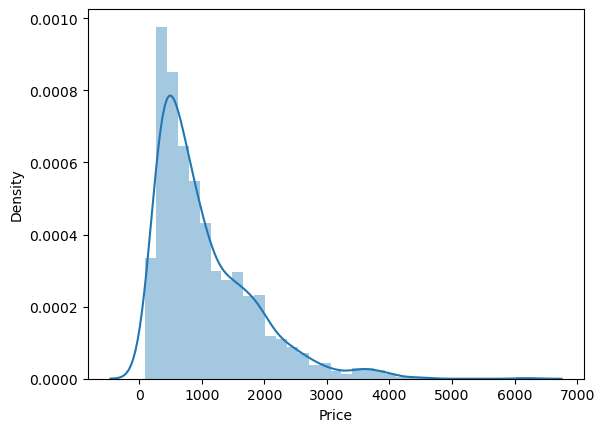

In [443]:
sns.distplot(df['Price'])
# plt.show()

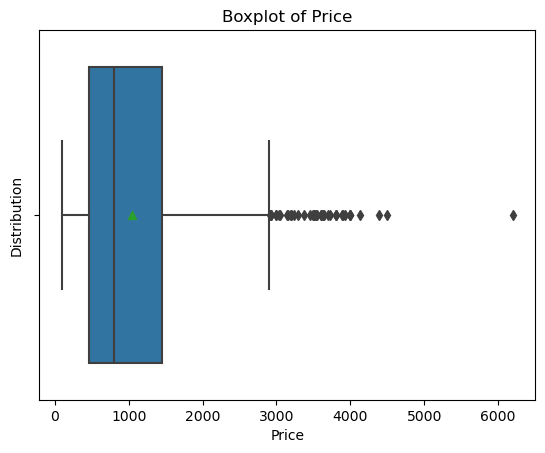

In [444]:
sns.boxplot(
    x = "Price",
    showmeans=True,
    data=df
)

plt.xlabel("Price")
plt.ylabel("Distribution")
plt.title("Boxplot of Price")
plt.show()

In [445]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

In [446]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Xác định ngưỡng cho outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Loại bỏ outlier
df_no_outliers = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

In [447]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1315 entries, 0 to 1449
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1315 non-null   float64
 1   Brand             1315 non-null   object 
 2   Screen Size       1315 non-null   float64
 3   CPU type          1315 non-null   object 
 4   Memory            1315 non-null   int64  
 5   Storage           1315 non-null   int64  
 6   GPU               1315 non-null   object 
 7   Resolution        1315 non-null   object 
 8   Backlit Keyboard  1315 non-null   object 
 9   Touchscreen       1315 non-null   object 
 10  Graphic Type      1315 non-null   object 
 11  Operating System  1315 non-null   object 
 12  Webcam            1315 non-null   object 
 13  Card Reader       1315 non-null   object 
 14  Thunderbolt       1315 non-null   object 
 15  title             1315 non-null   object 
 16  link              1315 non-null   object 
dtype

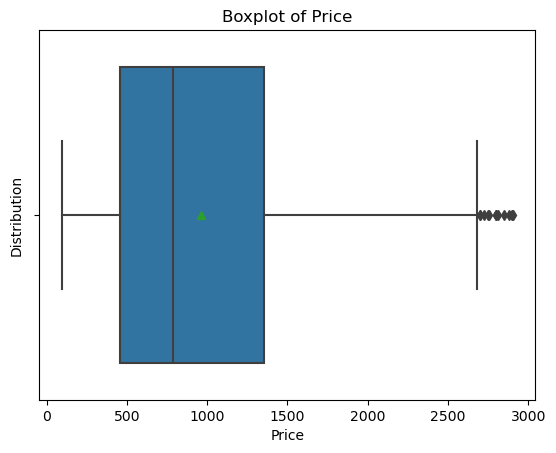

In [448]:
sns.boxplot(
    x = "Price",
    showmeans=True,
    data=df_no_outliers
)

plt.xlabel("Price")
plt.ylabel("Distribution")
plt.title("Boxplot of Price")
plt.show()

C:\Users\ngoct\AppData\Local\Temp\ipykernel_13376\13325941.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_outliers['Price'])
d:\App\miniconda3\envs\PTDL\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

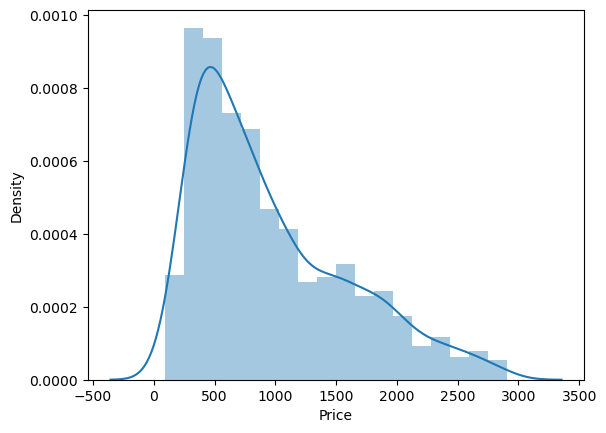

In [449]:
sns.distplot(df_no_outliers['Price'])
# plt.show()

In [450]:
df = df_no_outliers

In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1315 entries, 0 to 1449
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1315 non-null   float64
 1   Brand             1315 non-null   object 
 2   Screen Size       1315 non-null   float64
 3   CPU type          1315 non-null   object 
 4   Memory            1315 non-null   int64  
 5   Storage           1315 non-null   int64  
 6   GPU               1315 non-null   object 
 7   Resolution        1315 non-null   object 
 8   Backlit Keyboard  1315 non-null   object 
 9   Touchscreen       1315 non-null   object 
 10  Graphic Type      1315 non-null   object 
 11  Operating System  1315 non-null   object 
 12  Webcam            1315 non-null   object 
 13  Card Reader       1315 non-null   object 
 14  Thunderbolt       1315 non-null   object 
 15  title             1315 non-null   object 
 16  link              1315 non-null   object 
dtype

#### Brand

In [452]:
def countplot(column, xlabel, ylabel, title):
        plt.figure(figsize = (20,7))
        sns.countplot(x= column, data = df)
        plt.xticks(rotation='vertical')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.show()

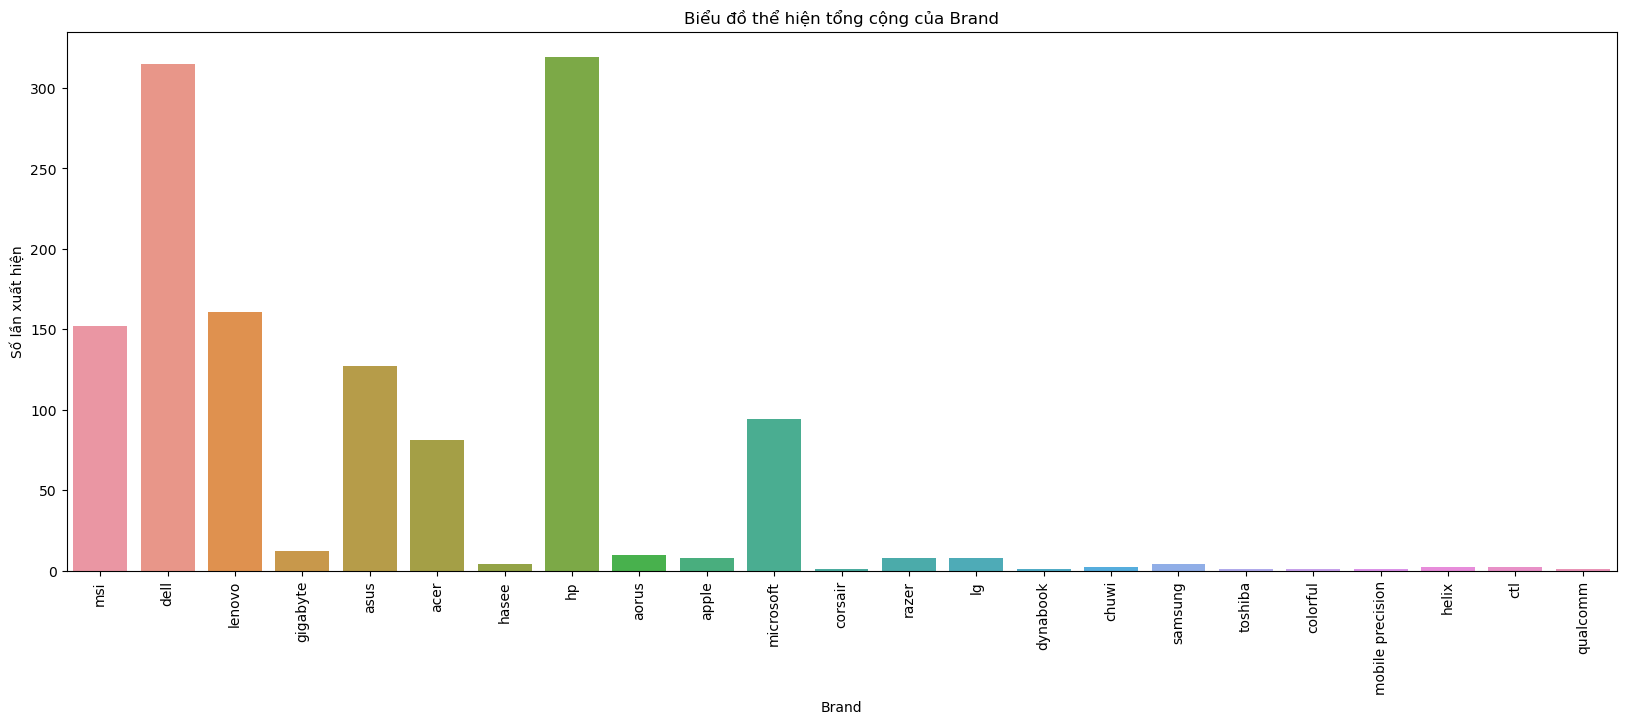

In [453]:
countplot('Brand', 'Brand', 'Số lần xuất hiện', 'Biểu đồ thể hiện tổng cộng của Brand')

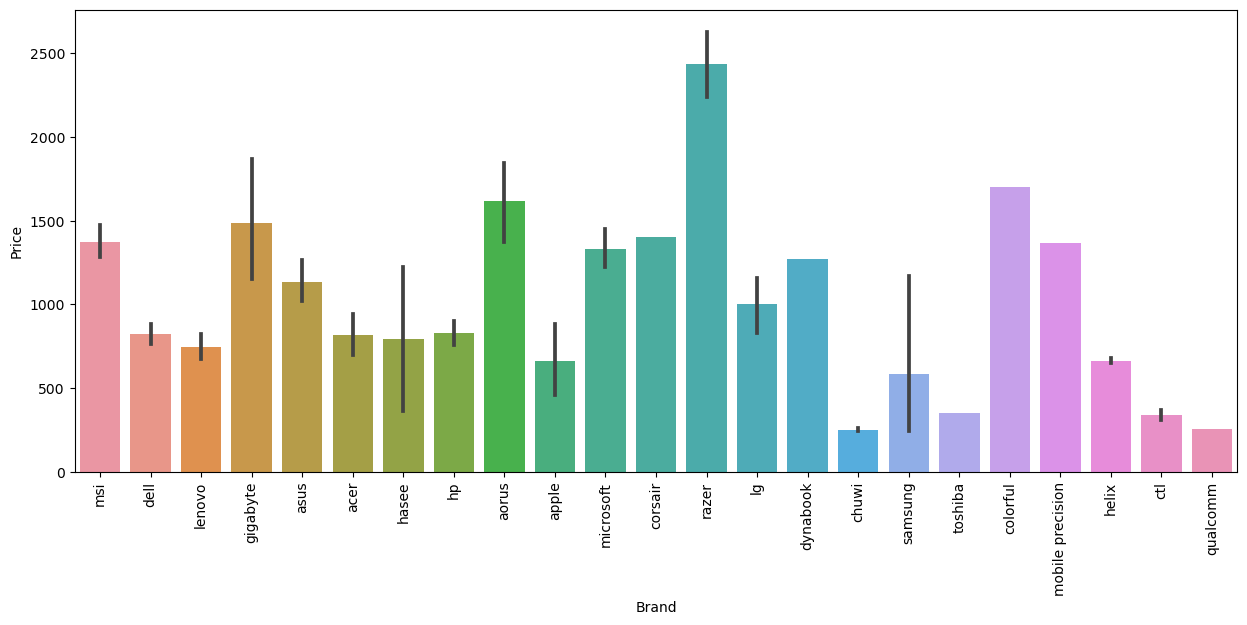

In [454]:
plt.figure(figsize = (15,6))
sns.barplot(x=df['Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

#### Screen Size

C:\Users\ngoct\AppData\Local\Temp\ipykernel_13376\577219536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Screen Size'])
d:\App\miniconda3\envs\PTDL\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Screen Size', ylabel='Density'>

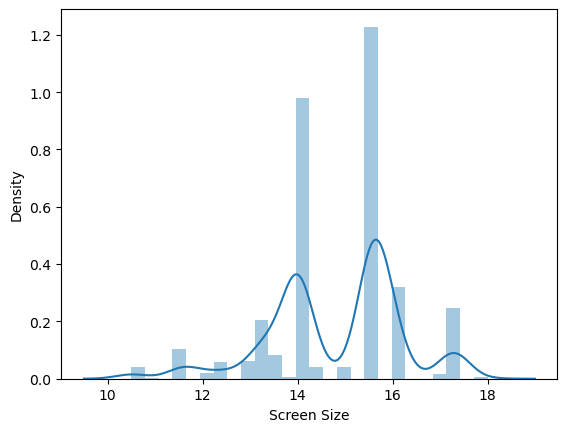

In [455]:
sns.distplot(df['Screen Size'])

<Axes: xlabel='Screen Size', ylabel='Price'>

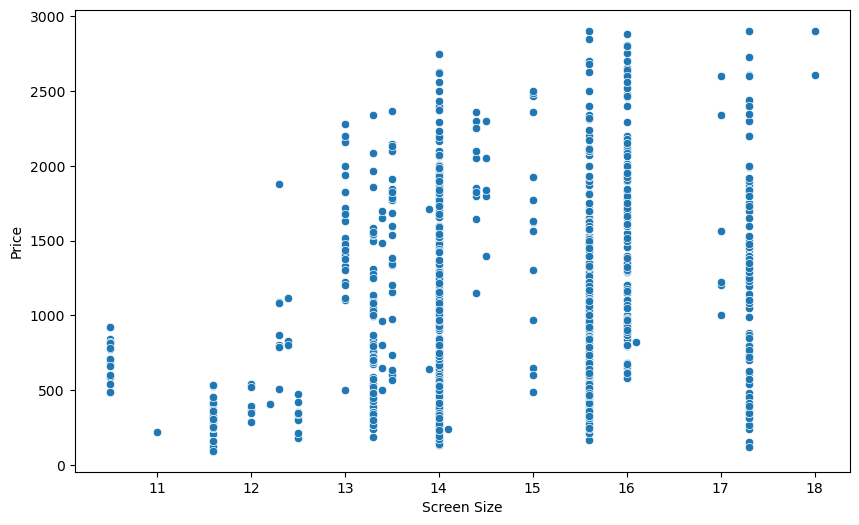

In [456]:
plt.figure(figsize = (10,6))
sns.scatterplot(x=df['Screen Size'],y=df['Price'])

### Feature Engineering

#### Graphic Type

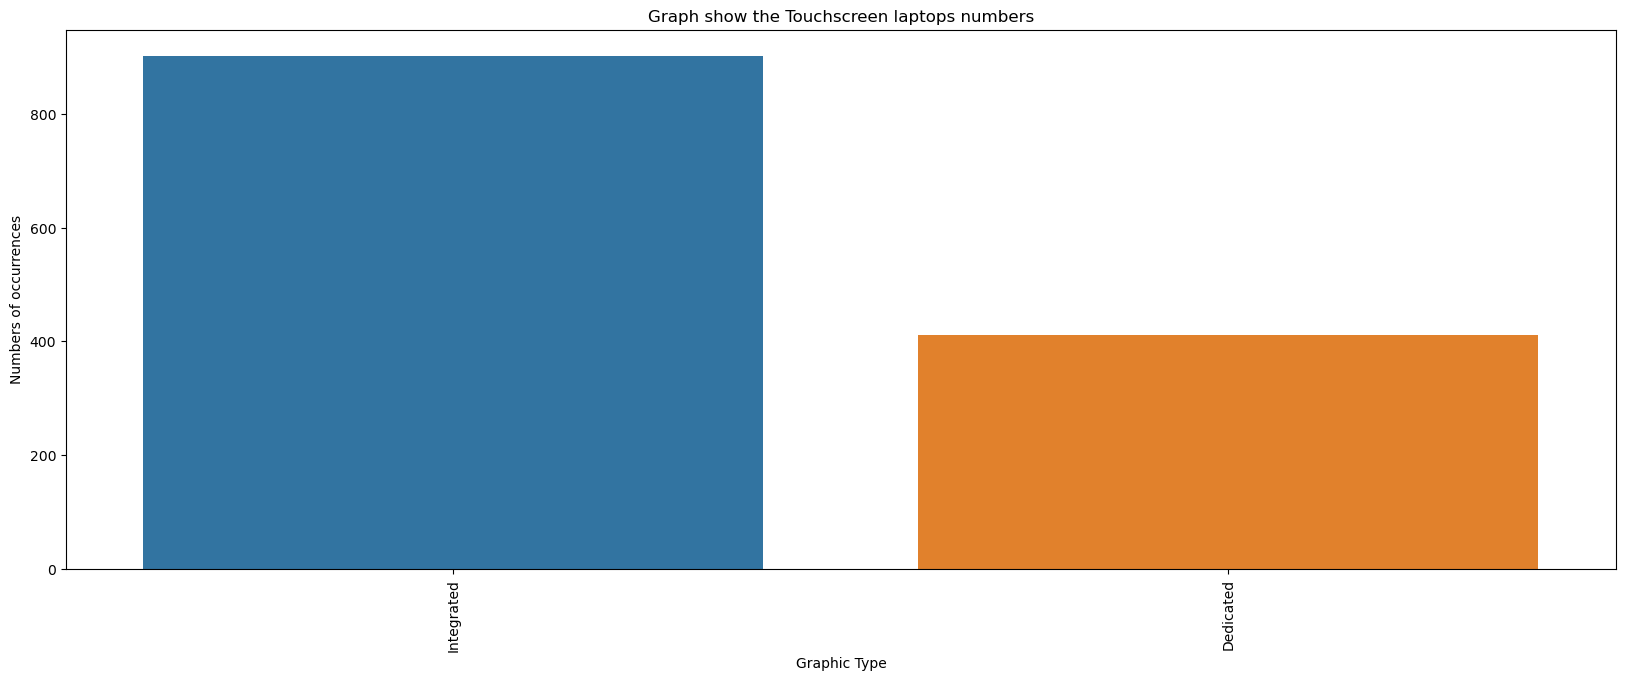

In [457]:
countplot('Graphic Type','Graphic Type', 'Numbers of occurrences', 'Graph show the Touchscreen laptops numbers')

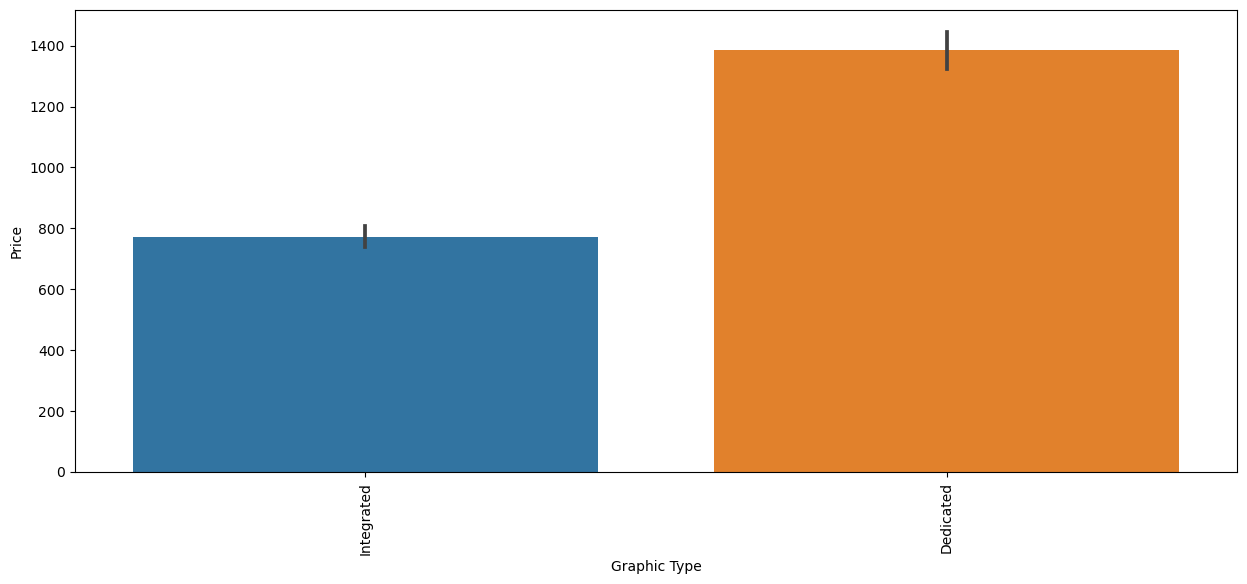

In [458]:
plt.figure(figsize = (15,6))
sns.barplot(x=df['Graphic Type'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

#### Backlit Keyboard

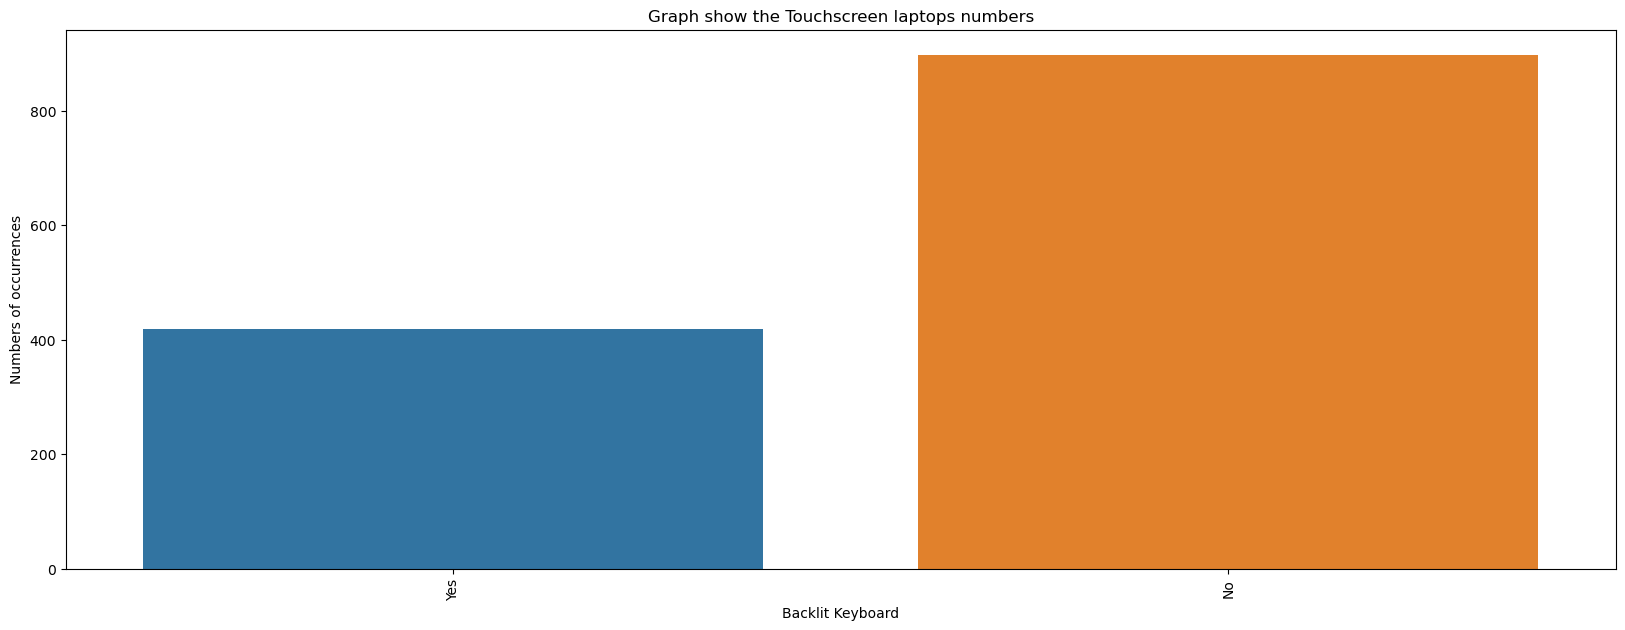

In [459]:
countplot('Backlit Keyboard','Backlit Keyboard', 'Numbers of occurrences', 'Graph show the Touchscreen laptops numbers')

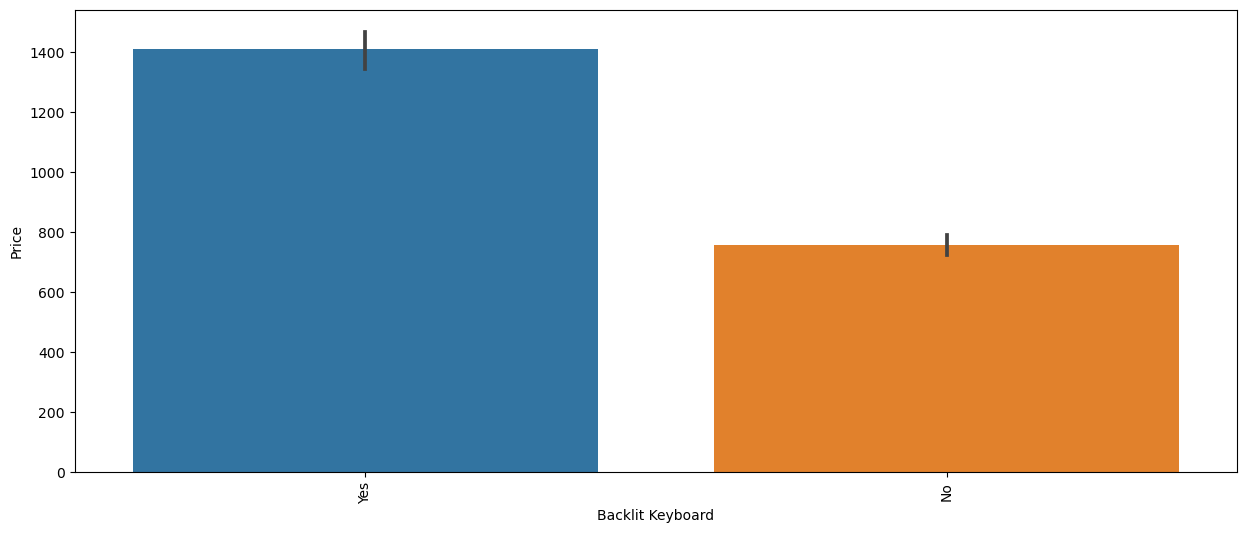

In [460]:
plt.figure(figsize = (15,6))
sns.barplot(x=df['Backlit Keyboard'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [461]:
df['Backlit Keyboard'].replace('Yes', 1, inplace=True)
df['Backlit Keyboard'].replace('No', 0, inplace=True)

#### Thunderbolt

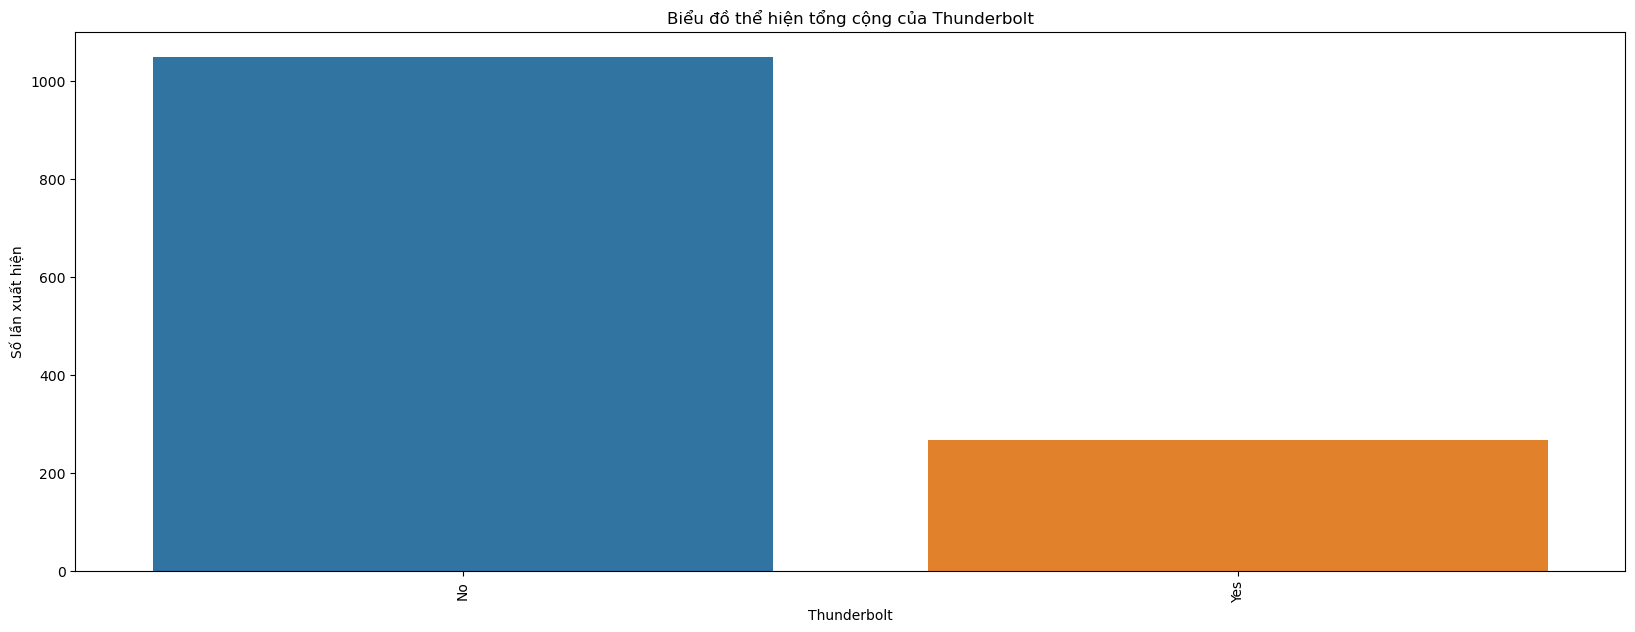

In [462]:
countplot('Thunderbolt', 'Thunderbolt', 'Số lần xuất hiện', 'Biểu đồ thể hiện tổng cộng của Thunderbolt')

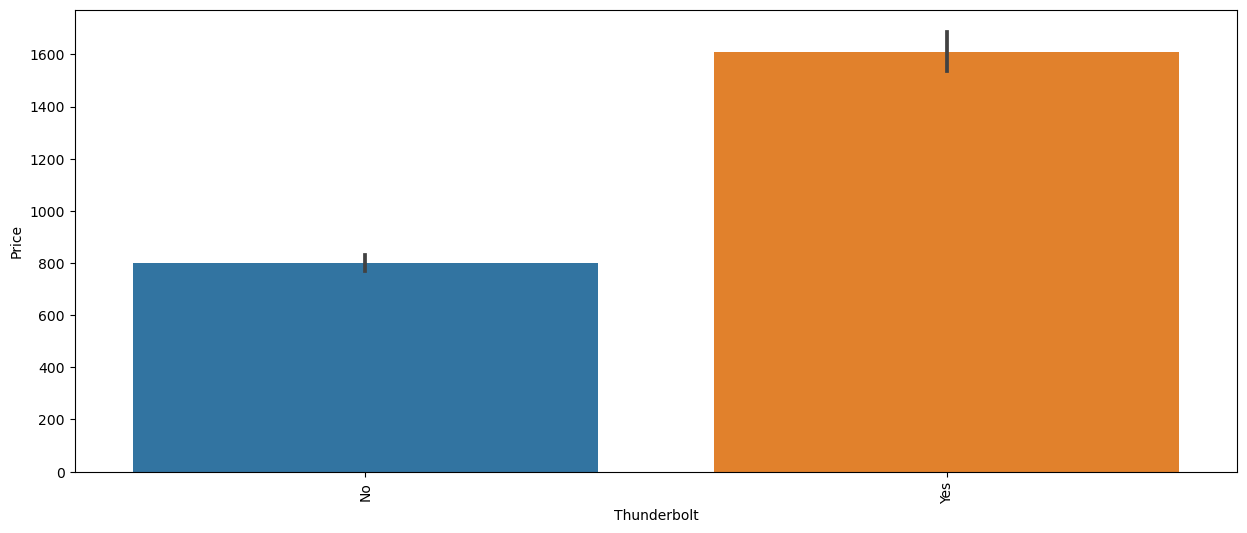

In [463]:
plt.figure(figsize = (15,6))
sns.barplot(x=df['Thunderbolt'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [464]:
df['Thunderbolt'].replace('Yes', 1, inplace=True)
df['Thunderbolt'].replace('No', 0, inplace=True)

#### Card Reader

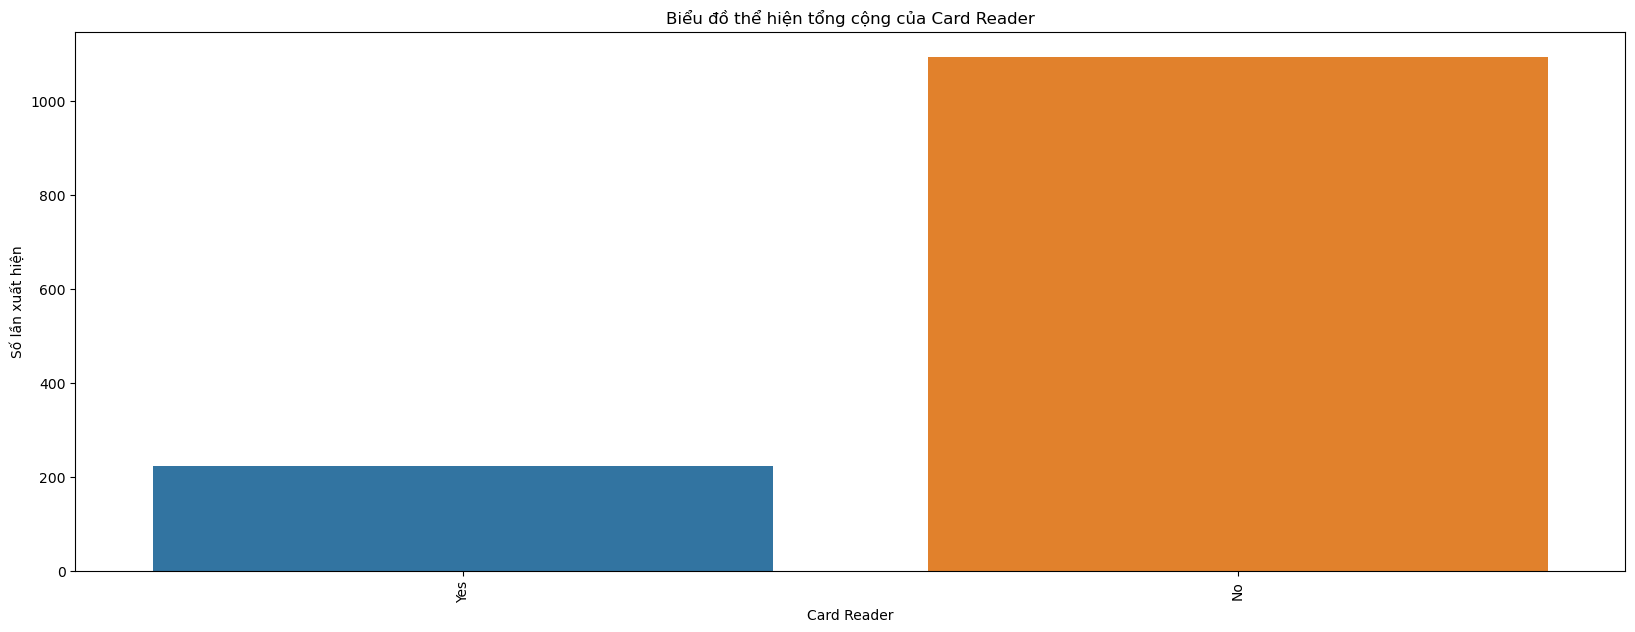

In [465]:
countplot('Card Reader', 'Card Reader', 'Số lần xuất hiện', 'Biểu đồ thể hiện tổng cộng của Card Reader')

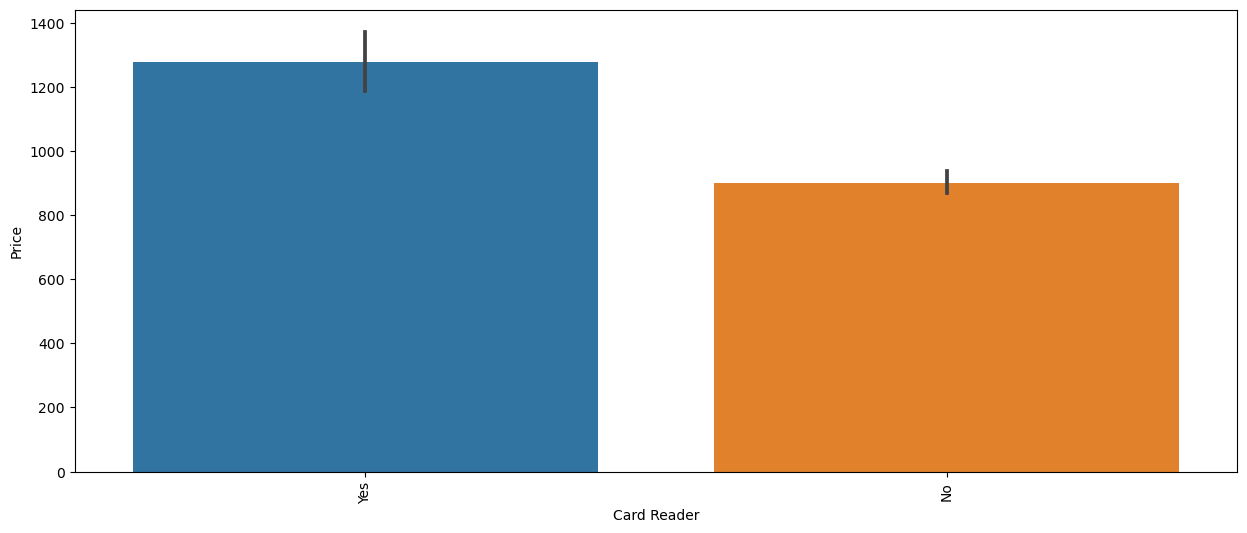

In [466]:
plt.figure(figsize = (15,6))
sns.barplot(x=df['Card Reader'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [467]:
df['Card Reader'].replace('Yes', 1, inplace=True)
df['Card Reader'].replace('No', 0, inplace=True)

#### Touchscreen

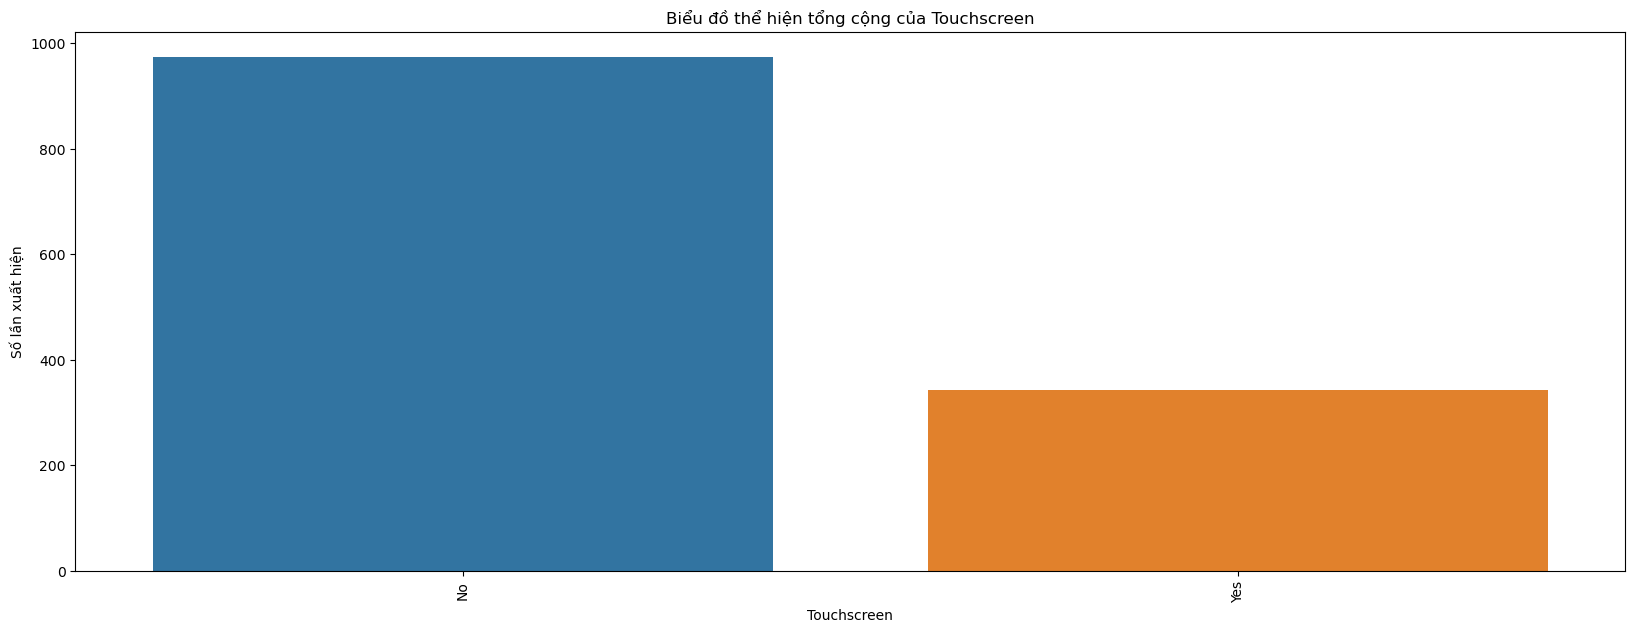

In [468]:
countplot('Touchscreen', 'Touchscreen', 'Số lần xuất hiện', 'Biểu đồ thể hiện tổng cộng của Touchscreen')

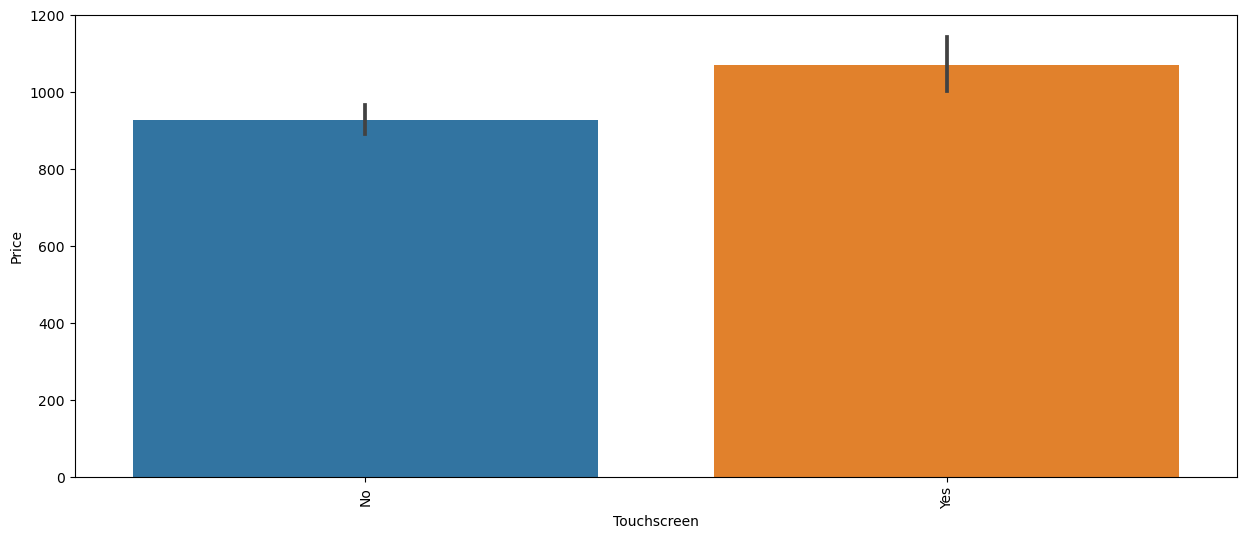

In [469]:
plt.figure(figsize = (15,6))
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [470]:
df['Touchscreen'].replace('Yes', 1, inplace=True)
df['Touchscreen'].replace('No', 0, inplace=True)

#### Resolution

In [471]:
res = df['Resolution'].str.split('x', n =1, expand = True)

In [472]:
res[0] = res[0].astype('int')
res[1] = res[1].astype('int')

In [473]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1315 entries, 0 to 1449
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1315 non-null   int32
 1   1       1315 non-null   int32
dtypes: int32(2)
memory usage: 20.5 KB


In [474]:
df['ppi'] = (((res[0] **2) + (res[1] **2)) **0.5) / df['Screen Size'].astype('float')

In [475]:
df.head()

,Price,Brand,Screen Size,CPU type,Memory,Storage,GPU,Resolution,Backlit Keyboard,Touchscreen,Graphic Type,Operating System,Webcam,Card Reader,Thunderbolt,title,link,ppi
0,699.00,msi,15.6,Intel Core i7 13th Gen,32,1024,Intel Iris Xe,1920x1080,1,0,Integrated,Windows 11 Home,Yes,1,0,"msi modern 15h 15.6"" ultra thin and light prof...",https://www.newegg.com/classic-black-msi-moder...,141.211998
1,314.99,dell,14.0,Intel Core i7 8th Gen,32,256,Intel UHD Graphics 620,1920x1080,0,1,Integrated,Windows 11 Pro,No,0,0,dell latitude 7400 intel core i7 8th gen 8665u...,https://www.newegg.com/black-dell-latitude-740...,157.350512
2,329.99,lenovo,15.6,Intel Core i3 13th Gen,8,256,Intel UHD Graphics,1920x1080,0,0,Integrated,Windows 11 in S mode,Yes,1,0,"lenovo 83b40000us 15.6"" laptop intel core i3 1...",https://www.newegg.com/abyss-blue-lenovo-ideap...,141.211998
3,649.99,lenovo,16.0,AMD Ryzen 7 7000 Series,16,512,AMD Radeon Graphics,1920x1200,1,1,Integrated,Windows 11 Home,Yes,1,0,"lenovo 82xg0019us 16.0"" laptop amd ryzen 7 700...",https://www.newegg.com/abyss-blue-lenovo-ideap...,141.509717
4,899.99,gigabyte,16.0,Intel Core i7 13th Gen,16,512,NVIDIA GeForce RTX 4060 Laptop GPU,1920x1200,1,0,Dedicated,Windows 11 Home,No,1,0,"gigabyte g6 kf - 16"" fhd 1920x1200 165hz - nvi...",https://www.newegg.com/black-gigabyte-g6-kf-h3...,141.509717


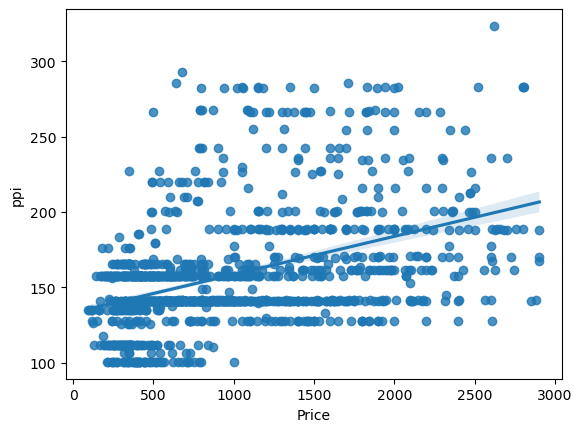

In [476]:
sns.regplot(x=df['Price'], y=df['ppi'], data=df)
plt.show()

#### CPU

In [477]:
df['CPU type'].unique()

array(['Intel Core i7 13th Gen', 'Intel Core i7 8th Gen',
       'Intel Core i3 13th Gen', 'AMD Ryzen 7 7000 Series',
       'Intel Core i7 12th Gen', 'Intel Core i9 13th Gen',
       'Intel Core i3 12th Gen', 'Intel Core i5 8th Gen',
       'Intel Core i7 11th Gen', 'AMD Ryzen 9 7000 Series',
       'Intel Core i5 13th Gen', 'Intel Celeron',
       'AMD Ryzen 5 5000 Series', 'Intel Core i5 12th Gen',
       'AMD Ryzen 5 7000 Series', 'Intel Core i5 11th Gen',
       'Intel Core i7 9th Gen', 'AMD Ryzen 7 6000 Series',
       'Intel Core i5', 'Intel Core i9 12th Gen',
       'AMD Ryzen 7 5000 Series', 'Intel Pentium Gold',
       'Intel Core i5 5th Gen', 'AMD Ryzen 5 4000 Series',
       'Intel Core i9 11th Gen', 'AMD Ryzen 7 4000 Series',
       'AMD Ryzen 9 6000 Series', 'Intel N-series',
       'Intel Core i5 6th Gen', 'AMD Ryzen 3 3000 Series',
       'Intel Core i5 12th\xa0Gen', 'Intel Core i5 7th Gen',
       'AMD Ryzen 7 PRO', 'Intel Core i3 11th Gen',
       'Intel Core i7 6th G

In [478]:
intel_core = ["Intel Core i{}".format(i) for i in range(3, 10, 2)]
amd_ryzen = ["AMD Ryzen {}".format(i) for i in range(3, 10, 2)]

# Tạo cột CPU
def categorize_cpu(cpu):
    if cpu.startswith("Intel Core") and cpu[:13] in intel_core:
        return cpu[:13]
    elif cpu.startswith("AMD Ryzen") and cpu[:11] in amd_ryzen:
        return cpu[:11]
    elif cpu.startswith("Intel"):
        return "Intel Other CPU"
    elif cpu.startswith("AMD"):
        return "AMD Other CPU"
    else:
        return "Other CPU"

In [479]:
df["CPU_series"] = df["CPU type"].apply(categorize_cpu)

In [480]:
df["CPU_series"].unique()

array(['Intel Core i7', 'Intel Core i3', 'AMD Ryzen 7', 'Intel Core i9',
       'Intel Core i5', 'AMD Ryzen 9', 'Intel Other CPU', 'AMD Ryzen 5',
       'AMD Ryzen 3', 'Other CPU', 'AMD Other CPU'], dtype=object)

In [481]:
df.head()

,Price,Brand,Screen Size,CPU type,Memory,Storage,GPU,Resolution,Backlit Keyboard,Touchscreen,Graphic Type,Operating System,Webcam,Card Reader,Thunderbolt,title,link,ppi,CPU_series
0,699.00,msi,15.6,Intel Core i7 13th Gen,32,1024,Intel Iris Xe,1920x1080,1,0,Integrated,Windows 11 Home,Yes,1,0,"msi modern 15h 15.6"" ultra thin and light prof...",https://www.newegg.com/classic-black-msi-moder...,141.211998,Intel Core i7
1,314.99,dell,14.0,Intel Core i7 8th Gen,32,256,Intel UHD Graphics 620,1920x1080,0,1,Integrated,Windows 11 Pro,No,0,0,dell latitude 7400 intel core i7 8th gen 8665u...,https://www.newegg.com/black-dell-latitude-740...,157.350512,Intel Core i7
2,329.99,lenovo,15.6,Intel Core i3 13th Gen,8,256,Intel UHD Graphics,1920x1080,0,0,Integrated,Windows 11 in S mode,Yes,1,0,"lenovo 83b40000us 15.6"" laptop intel core i3 1...",https://www.newegg.com/abyss-blue-lenovo-ideap...,141.211998,Intel Core i3
3,649.99,lenovo,16.0,AMD Ryzen 7 7000 Series,16,512,AMD Radeon Graphics,1920x1200,1,1,Integrated,Windows 11 Home,Yes,1,0,"lenovo 82xg0019us 16.0"" laptop amd ryzen 7 700...",https://www.newegg.com/abyss-blue-lenovo-ideap...,141.509717,AMD Ryzen 7
4,899.99,gigabyte,16.0,Intel Core i7 13th Gen,16,512,NVIDIA GeForce RTX 4060 Laptop GPU,1920x1200,1,0,Dedicated,Windows 11 Home,No,1,0,"gigabyte g6 kf - 16"" fhd 1920x1200 165hz - nvi...",https://www.newegg.com/black-gigabyte-g6-kf-h3...,141.509717,Intel Core i7


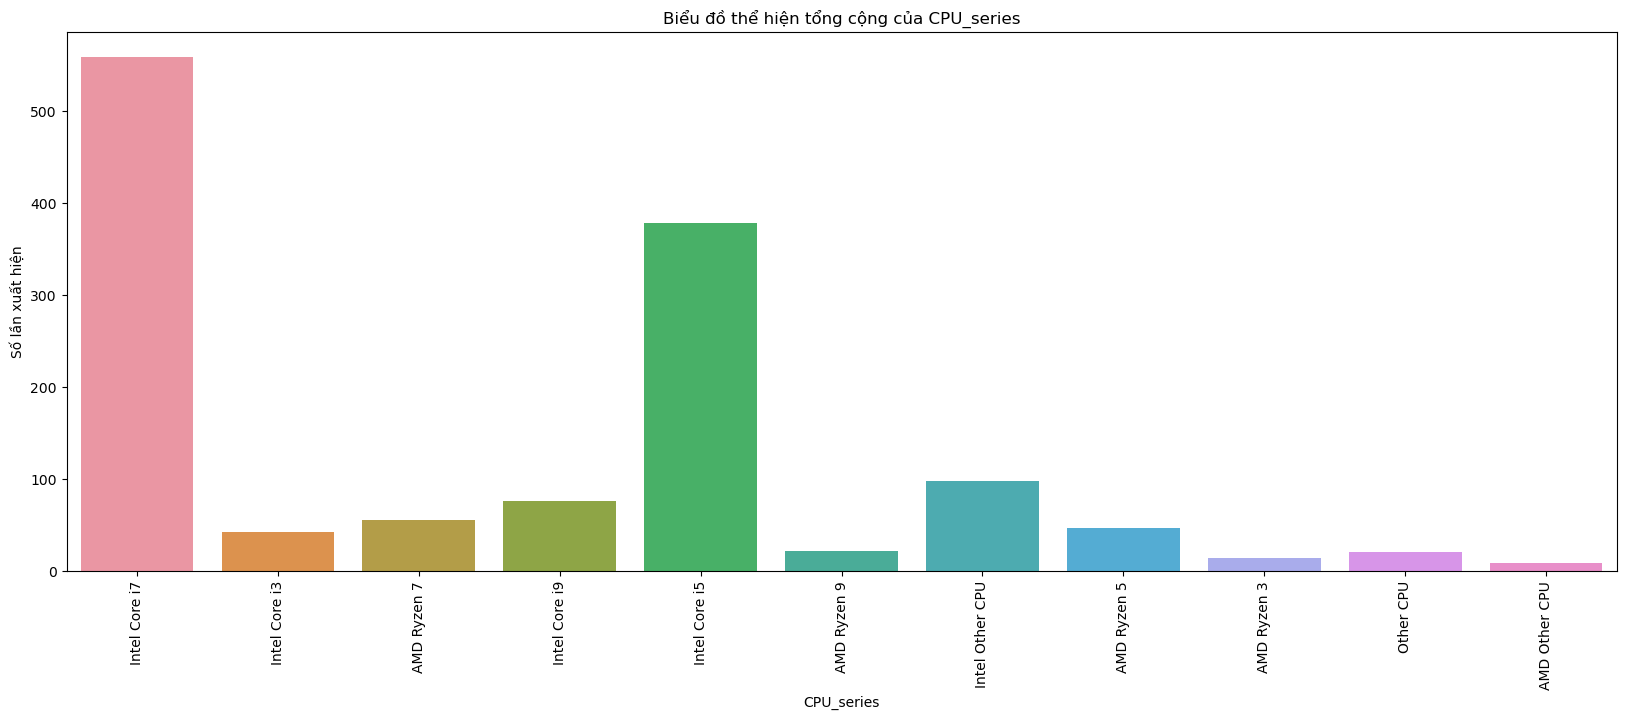

In [482]:
countplot('CPU_series', 'CPU_series', 'Số lần xuất hiện', 'Biểu đồ thể hiện tổng cộng của CPU_series')

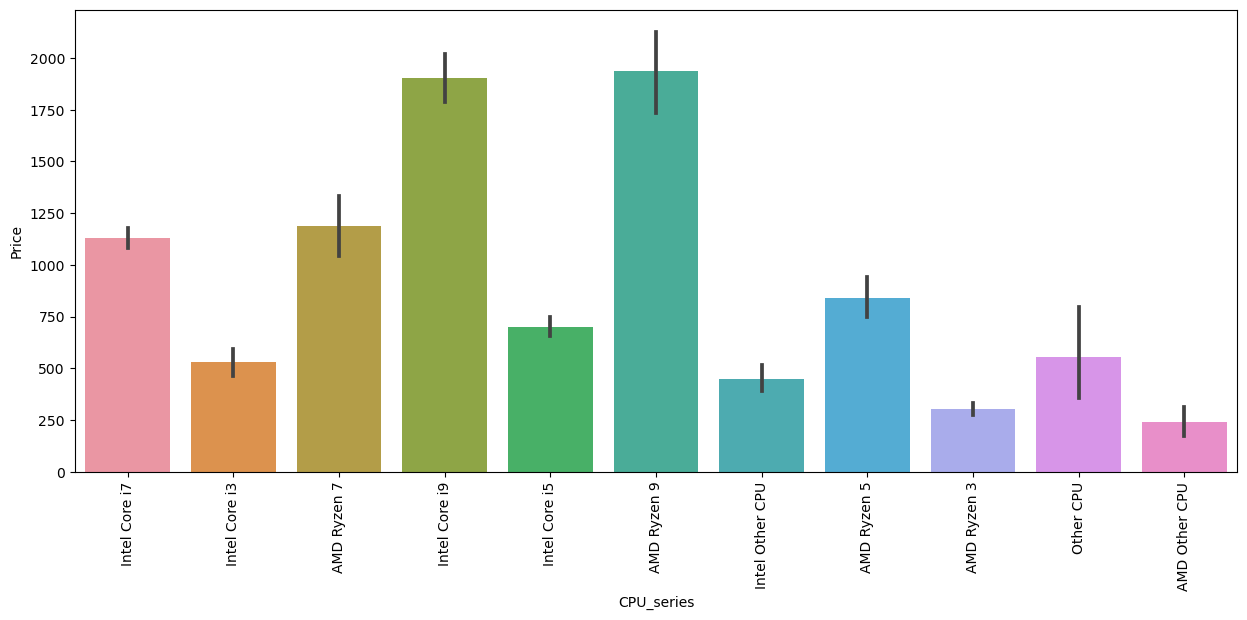

In [483]:
plt.figure(figsize = (15,6))
sns.barplot(x=df['CPU_series'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

#### Memory

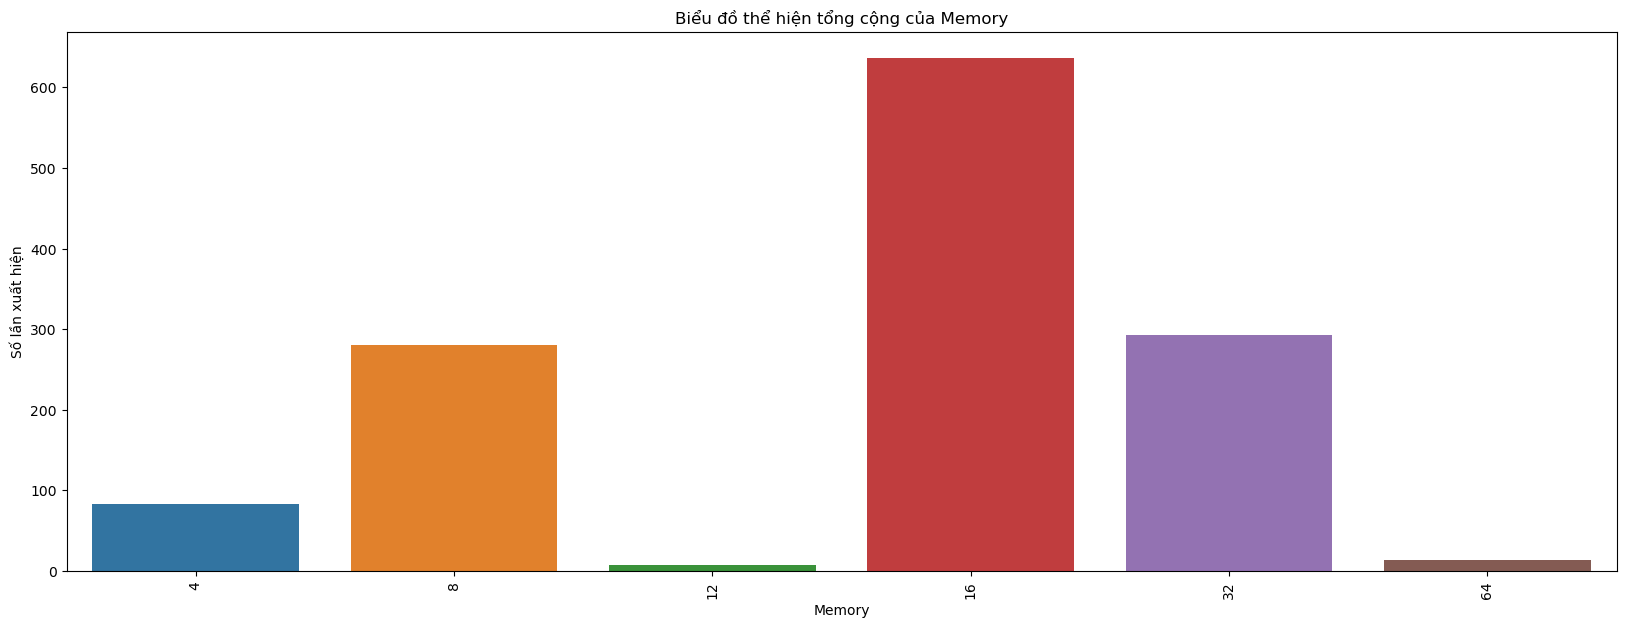

In [484]:
countplot('Memory', 'Memory', 'Số lần xuất hiện', 'Biểu đồ thể hiện tổng cộng của Memory')

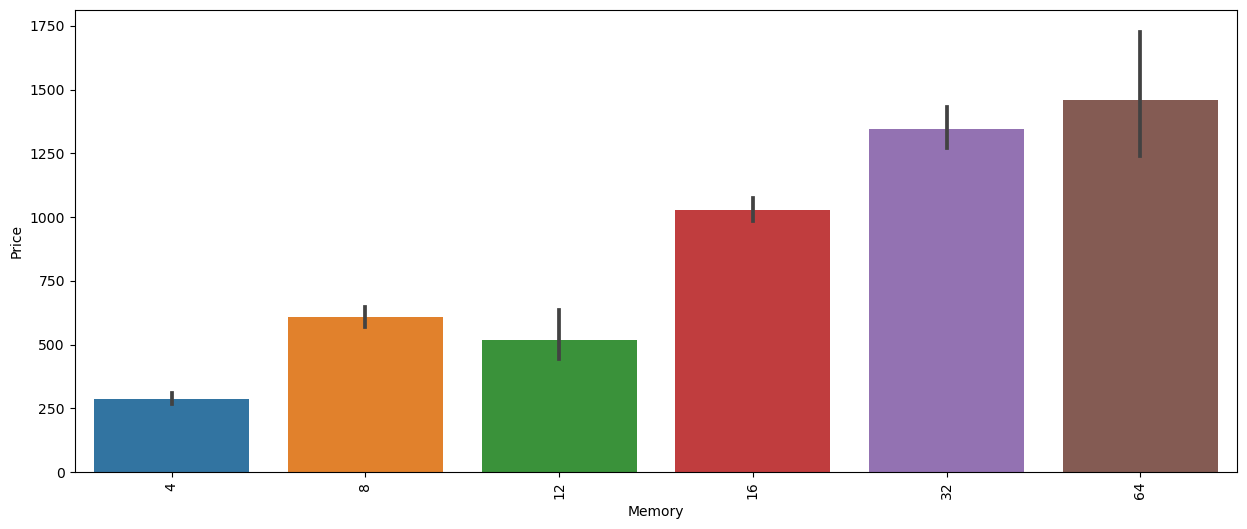

In [485]:
plt.figure(figsize = (15,6))
sns.barplot(x=df['Memory'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

#### Storage

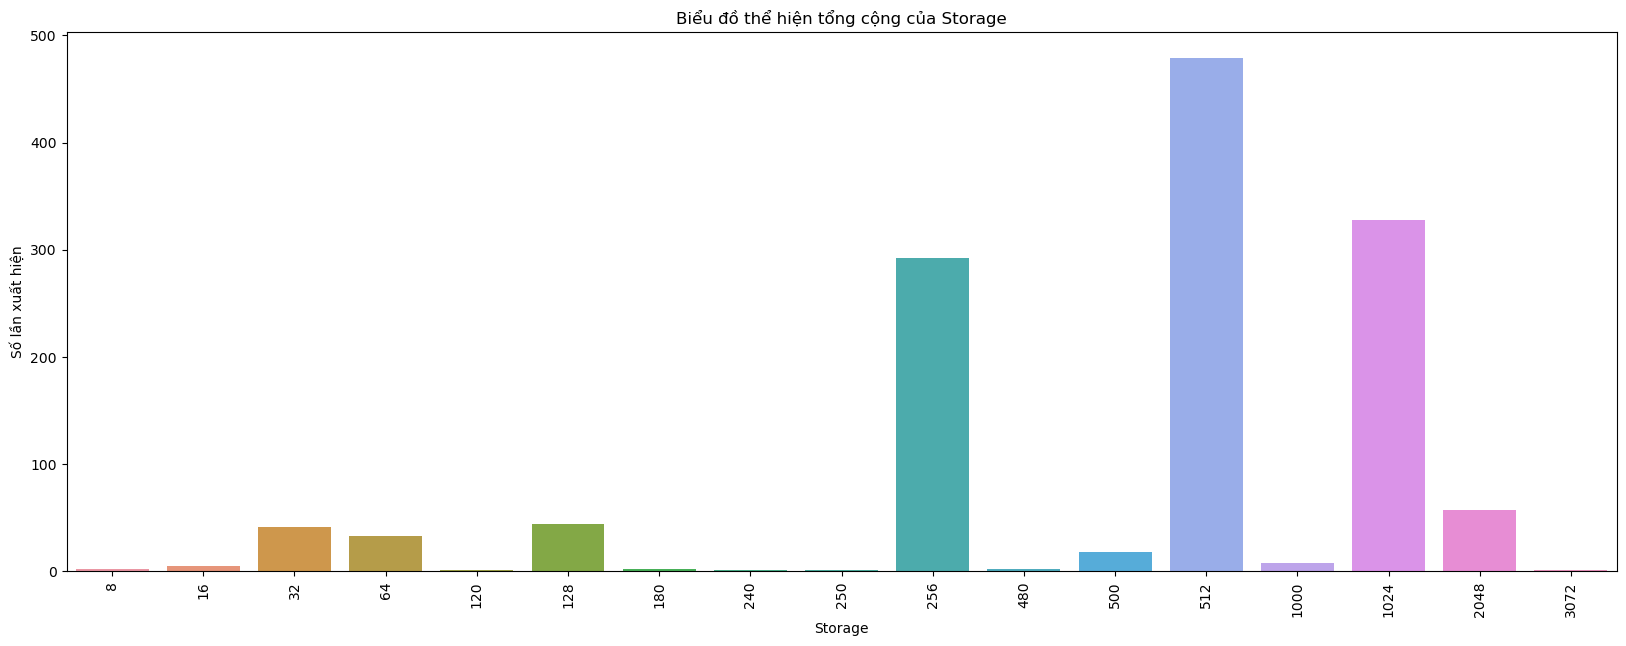

In [486]:
countplot('Storage', 'Storage', 'Số lần xuất hiện', 'Biểu đồ thể hiện tổng cộng của Storage')

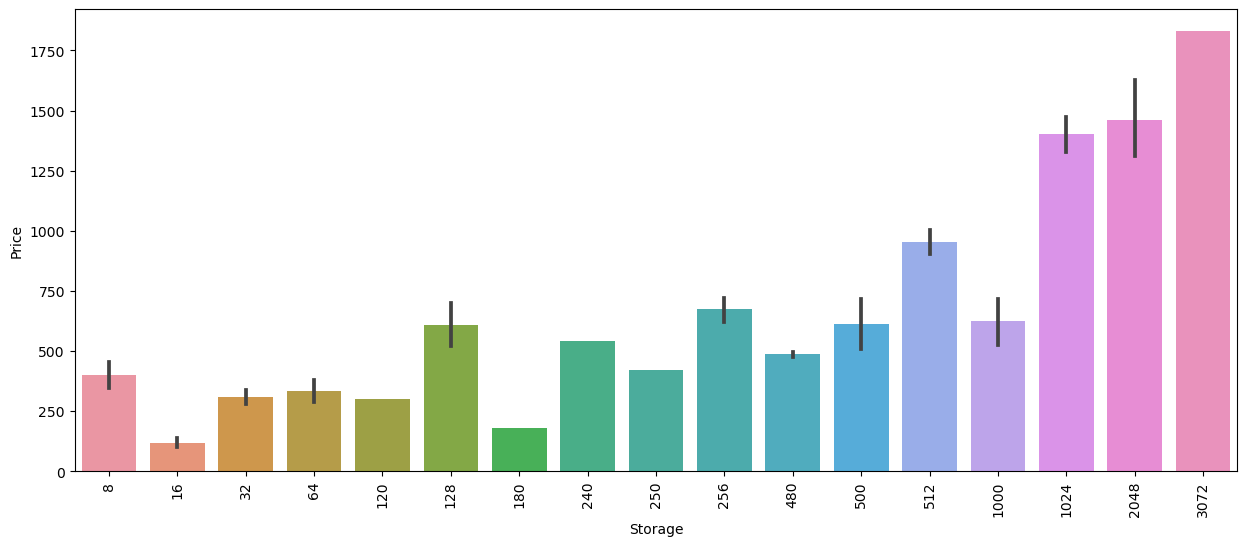

In [487]:
plt.figure(figsize = (15,6))
sns.barplot(x=df['Storage'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

#### GPU

In [488]:
df['GPU'].value_counts()

GPU
Intel Iris Xe                          253
Intel UHD Graphics                     148
No                                     146
Intel UHD Graphics 620                  91
AMD Radeon Graphics                     64
                                      ... 
AMD Radeon Pro 5300M                     1
AMD Radeon RX 6550M                      1
NVIDIA GeForce GTX 1650                  1
NVIDIA GeForce RTX 2070 SUPER Max-Q      1
AMD Radeon 740M Graphics                 1
Name: count, Length: 103, dtype: int64

In [489]:
def categorize_gpu(gpu):
    if gpu == "No":
        return "No"
    elif gpu.startswith("Intel"):
        return "Intel"
    elif gpu.startswith("AMD"):
        return "AMD"
    elif gpu.startswith("NVIDIA"):
        return "NVIDIA"
    else:
        return "Other GPU"

In [490]:
df["GPU_brand"] = df["GPU"].apply(categorize_gpu)

In [491]:
df["GPU_brand"].unique()

array(['Intel', 'AMD', 'NVIDIA', 'No', 'Other GPU'], dtype=object)

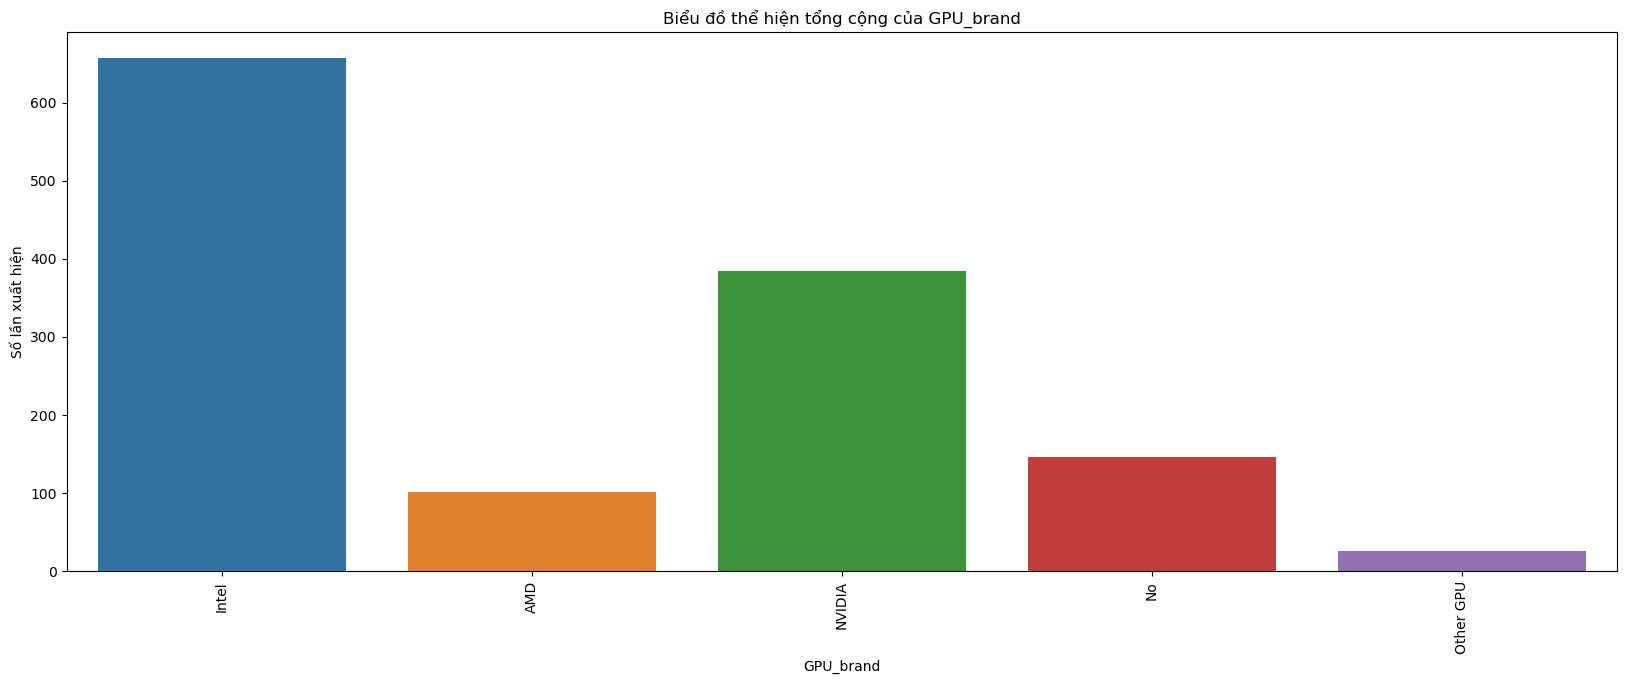

In [492]:
countplot('GPU_brand', 'GPU_brand', 'Số lần xuất hiện', 'Biểu đồ thể hiện tổng cộng của GPU_brand')

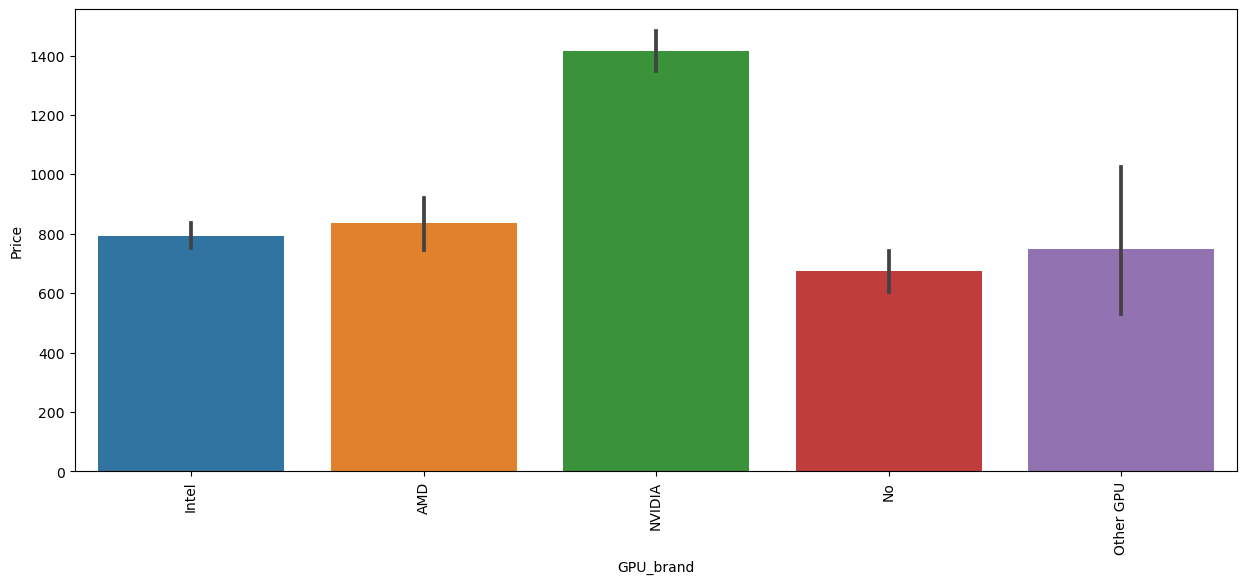

In [493]:
plt.figure(figsize = (15,6))
sns.barplot(x=df['GPU_brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

#### OS

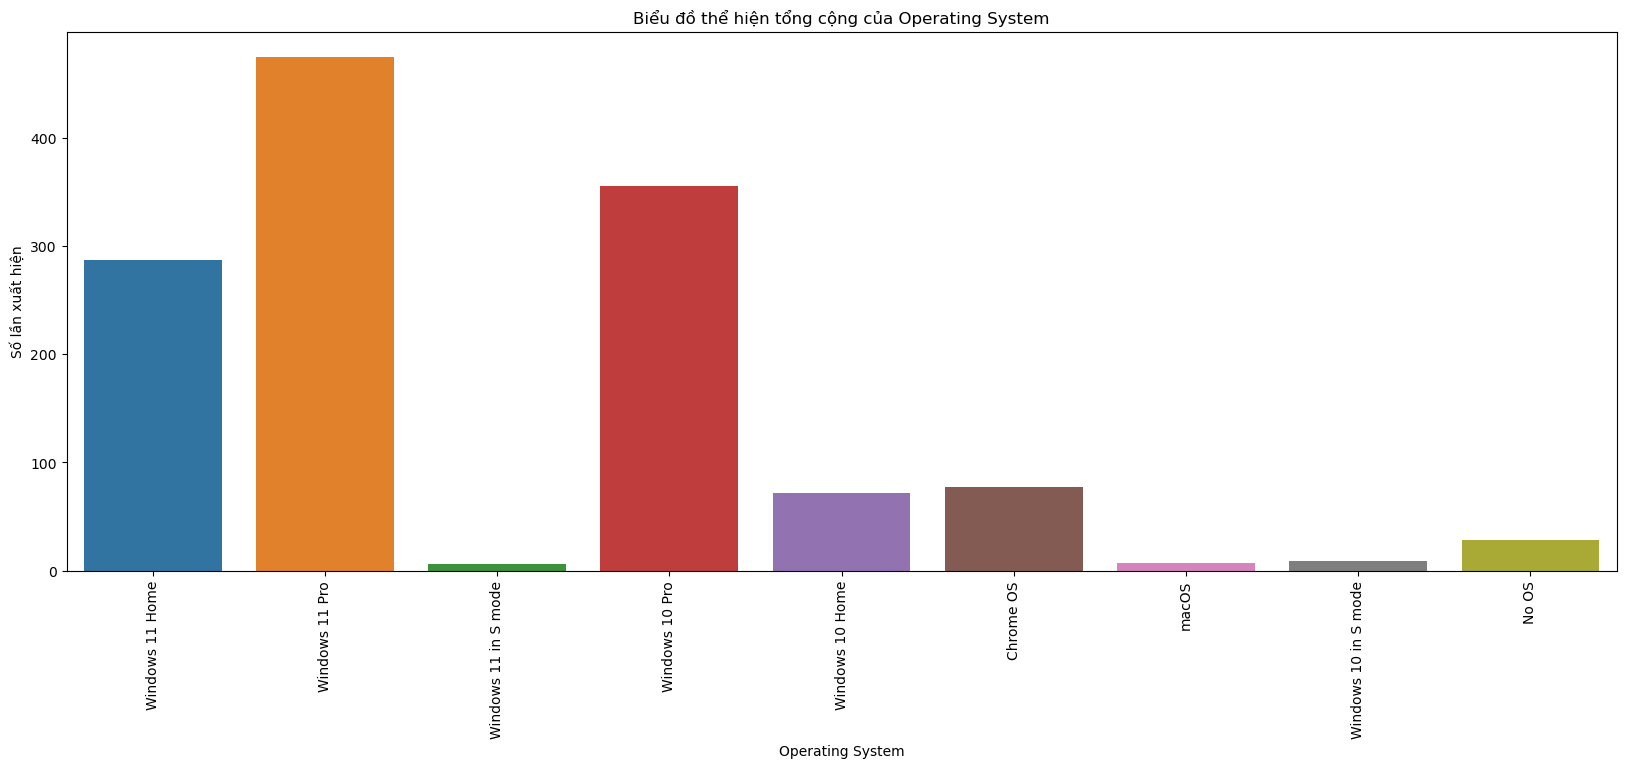

In [494]:
countplot('Operating System', 'Operating System', 'Số lần xuất hiện', 'Biểu đồ thể hiện tổng cộng của Operating System')

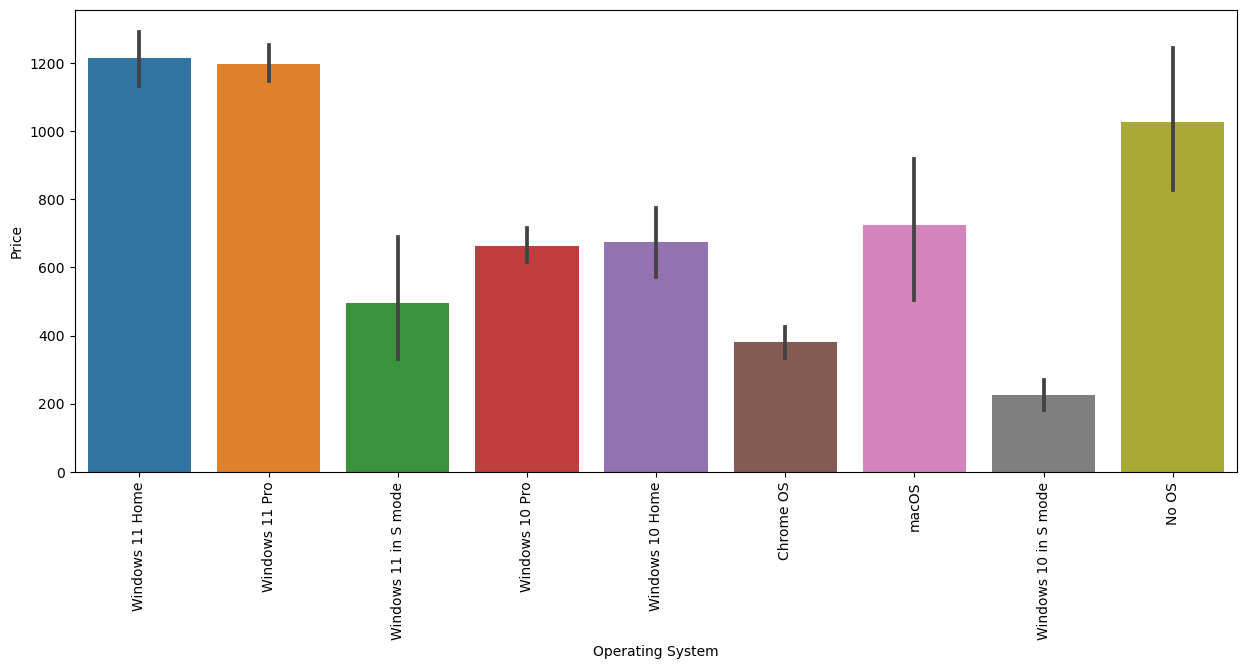

In [495]:
plt.figure(figsize = (15,6))
sns.barplot(x=df['Operating System'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [496]:
df.corr(numeric_only=True)['Price']

Price               1.000000
Screen Size         0.288747
Memory              0.431159
Storage             0.464593
Backlit Keyboard    0.480804
Touchscreen         0.099209
Card Reader         0.223196
Thunderbolt         0.516101
ppi                 0.431469
Name: Price, dtype: float64

<Axes: >

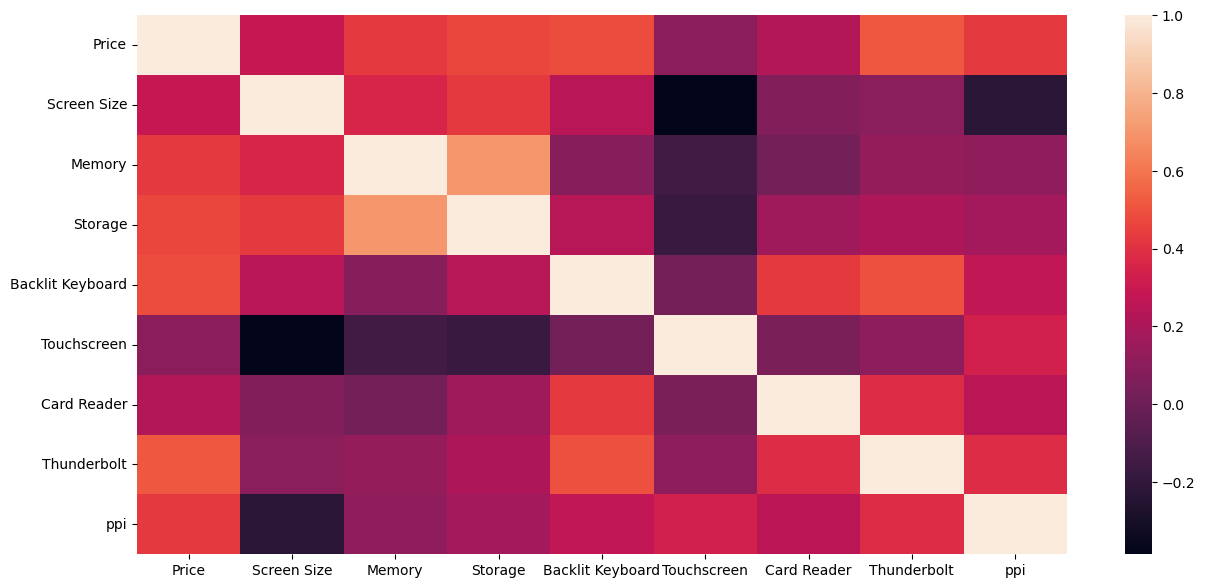

In [497]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(numeric_only=True))

C:\Users\ngoct\AppData\Local\Temp\ipykernel_13376\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])
d:\App\miniconda3\envs\PTDL\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

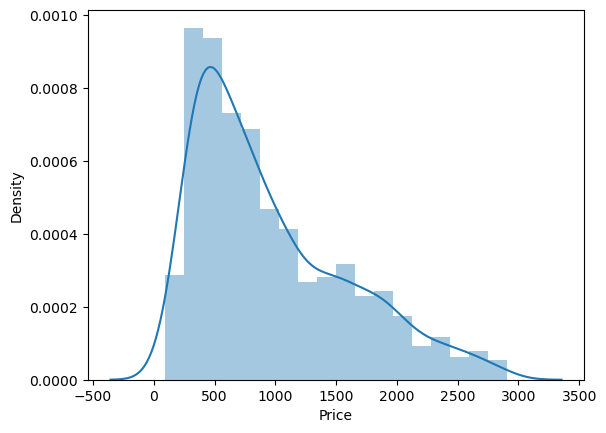

In [498]:
sns.distplot(df['Price'])

C:\Users\ngoct\AppData\Local\Temp\ipykernel_13376\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))
d:\App\miniconda3\envs\PTDL\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

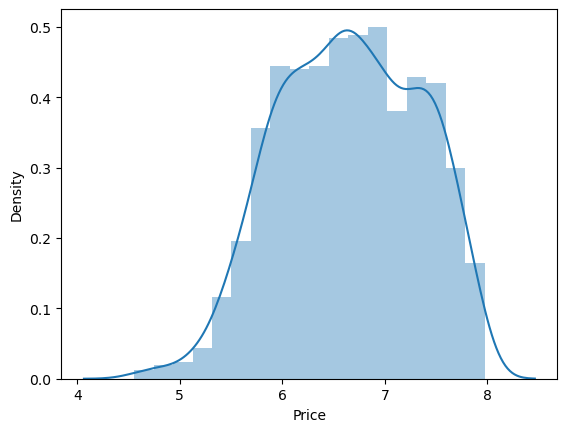

In [499]:
sns.distplot(np.log(df['Price']))

In [500]:
# df.to_csv("temp.csv")

In [501]:
df.head()

,Price,Brand,Screen Size,CPU type,Memory,Storage,GPU,Resolution,Backlit Keyboard,Touchscreen,Graphic Type,Operating System,Webcam,Card Reader,Thunderbolt,title,link,ppi,CPU_series,GPU_brand
0,699.00,msi,15.6,Intel Core i7 13th Gen,32,1024,Intel Iris Xe,1920x1080,1,0,Integrated,Windows 11 Home,Yes,1,0,"msi modern 15h 15.6"" ultra thin and light prof...",https://www.newegg.com/classic-black-msi-moder...,141.211998,Intel Core i7,Intel
1,314.99,dell,14.0,Intel Core i7 8th Gen,32,256,Intel UHD Graphics 620,1920x1080,0,1,Integrated,Windows 11 Pro,No,0,0,dell latitude 7400 intel core i7 8th gen 8665u...,https://www.newegg.com/black-dell-latitude-740...,157.350512,Intel Core i7,Intel
2,329.99,lenovo,15.6,Intel Core i3 13th Gen,8,256,Intel UHD Graphics,1920x1080,0,0,Integrated,Windows 11 in S mode,Yes,1,0,"lenovo 83b40000us 15.6"" laptop intel core i3 1...",https://www.newegg.com/abyss-blue-lenovo-ideap...,141.211998,Intel Core i3,Intel
3,649.99,lenovo,16.0,AMD Ryzen 7 7000 Series,16,512,AMD Radeon Graphics,1920x1200,1,1,Integrated,Windows 11 Home,Yes,1,0,"lenovo 82xg0019us 16.0"" laptop amd ryzen 7 700...",https://www.newegg.com/abyss-blue-lenovo-ideap...,141.509717,AMD Ryzen 7,AMD
4,899.99,gigabyte,16.0,Intel Core i7 13th Gen,16,512,NVIDIA GeForce RTX 4060 Laptop GPU,1920x1200,1,0,Dedicated,Windows 11 Home,No,1,0,"gigabyte g6 kf - 16"" fhd 1920x1200 165hz - nvi...",https://www.newegg.com/black-gigabyte-g6-kf-h3...,141.509717,Intel Core i7,NVIDIA


## Model

### ANOVA

In [502]:


# Define independent and dependent variables
independent_var = "Resolution"
dependent_var = "Price"

# Create a linear model
formula = f"{dependent_var} ~ C({independent_var})"
model = smf.ols(formula=formula, data=df).fit()

# Perform one-way ANOVA
anova_results = anova_lm(model)

print(anova_results)
# Print the ANOVA table
print(anova_results.index[0])
print(anova_results['PR(>F)'].iloc[0])
print(anova_results['F'].iloc[0])

                   df        sum_sq       mean_sq          F         PR(>F)
C(Resolution)    29.0  2.406991e+08  8.299969e+06  37.504452  8.537811e-149
Residual       1285.0  2.843785e+08  2.213062e+05        NaN            NaN
C(Resolution)
8.537810887040711e-149
37.50445237968098


In [503]:
anova_results['PR(>F)'].iloc[0]

8.537810887040711e-149

In [504]:
from scipy import stats

def cal_anova_of_variable(lst_col, option=True):
    df_groups = df.groupby(lst_col[:-1])

    names_groups = df[df[lst_col[:-1]].duplicated()==True][lst_col[:-1]].drop_duplicates().values

    group_values = [df_groups.get_group(tuple(name))['Price'] for name in names_groups]

    f_statistic, p_value = stats.f_oneway(*group_values)
    if p_value < 0.05:
        if option:
            lst = [[list(name), 0] for name in names_groups]
            for i in range(len(group_values)-1):
                for j in range(i+1, len(group_values)):
                    f, _ = stats.f_oneway(group_values[i], group_values[j])
                    lst[i][1] += f
                    lst[j][1] += f
            return lst
        else:
            return f_statistic
    else:
        return False

In [505]:
from itertools import combinations

def find_k_category_variable(category_col, k, type='max', return_lst=False):
  result, lst, temp_max, temp_min = [], [], 0, 0
  lst_group = list(combinations(category_col, k)) # tổ hợp k biến trong danh sách biến phân loại
  for group in lst_group:
    value = cal_anova_of_variable(list(group+('Price',)), option=False)
    if value:
      lst.append(value)
      result.append(group)

  if return_lst == True:
    return [[result[i], lst[i]] for i in np.argsort(lst)[::-1]]
  elif type=='max':
    return result[np.argmax(lst)]
  else: return result[np.argmin(lst)]

In [506]:
category_col = ['Brand', 'CPU type', 'GPU', 
                'Resolution', 'Graphic Type', 'Operating System', 
                'ppi', 'Card Reader', 'Thunderbolt',
                'CPU_series', 'GPU_brand', 'Storage', 'Touchscreen']

In [507]:
find_k_category_variable(category_col, 13, 'max', False)

('Brand',
 'CPU type',
 'GPU',
 'Resolution',
 'Graphic Type',
 'Operating System',
 'ppi',
 'Card Reader',
 'Thunderbolt',
 'CPU_series',
 'GPU_brand',
 'Storage',
 'Touchscreen')

### Training

In [508]:
# Chọn các biến đầu vào và đầu ra
features = ['Memory', 'Storage', "ppi", "Screen Size", 'Backlit Keyboard', 'Thunderbolt',
            'Graphic Type', "CPU_series", "GPU_brand", "Brand", "Operating System"]
target = "Price"

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=2)

# Xây dựng pipeline
numeric_features = ['Memory', 'Storage', "ppi", "Screen Size"]
categorical_features = ['Graphic Type', "CPU_series", "GPU_brand", "Brand", "Operating System", 'Backlit Keyboard', 'Thunderbolt']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [509]:
from sklearn.linear_model import LinearRegression
# Xây dựng pipeline với model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# Đánh giá hiệu suất trên tập kiểm tra
score = pipeline.score(X_test, y_test)
y_pred = pipeline.predict(X_test)
print(f'R^2 Score on Test Set: {score}')
print(f'MAE Score on Test Set: {mean_absolute_error(y_test, y_pred)}')
print(f'RMSE Score on Test Set: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R^2 Score on Test Set: 0.6283528671266203
MAE Score on Test Set: 290.5168691111599
RMSE Score on Test Set: 398.9405133093603


In [510]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'epsilon': [0.001, 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5)

# Xây dựng pipeline với model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', grid_search)
])


# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# Đánh giá hiệu suất trên tập kiểm tra
score = pipeline.score(X_test, y_test)
y_pred = pipeline.predict(X_test)
print(f'R^2 Score on Test Set: {score}')
print(f'MAE Score on Test Set: {mean_absolute_error(y_test, y_pred)}')
print(f'RMSE Score on Test Set: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R^2 Score on Test Set: 0.6215193153691734
MAE Score on Test Set: 266.46805713429666
RMSE Score on Test Set: 402.5915072227217


In [511]:
# Dựng model
ridge_model = RidgeCV(alphas=[0.01, 0.05, 0.1], cv=10)
rf_model = RandomForestRegressor(n_estimators=300,
                            random_state=42,
                            max_samples=0.8,
                            max_features=0.75,
                            max_depth=20)

# Xây dựng pipeline với model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf_model)
])

# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# Đánh giá hiệu suất trên tập kiểm tra
score = pipeline.score(X_test, y_test)
y_pred = pipeline.predict(X_test)
print(f'R^2 Score on Test Set: {score}')
print(f'MAE Score on Test Set: {mean_absolute_error(y_test, y_pred)}')
print(f'RMSE Score on Test Set: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R^2 Score on Test Set: 0.731689918996925
MAE Score on Test Set: 231.45082353607268
RMSE Score on Test Set: 338.96998485924433


## Làm thêm

In [512]:
grouped_df = df.groupby(['Brand', 'Operating System', 'Memory']).agg({'Price': 'mean'}).reset_index()

In [513]:
grouped_df

,Brand,Operating System,Memory,Price
0,acer,Chrome OS,4,306.466190
1,acer,Chrome OS,8,631.923333
2,acer,Chrome OS,16,1099.990000
3,acer,No OS,4,249.990000
4,acer,No OS,16,1046.656667
...,...,...,...,...
139,samsung,Chrome OS,4,209.990000
140,samsung,Windows 10 Home,4,329.990000
141,samsung,Windows 11 Home,8,349.990000
142,samsung,Windows 11 Pro,16,1449.990000


In [514]:
print("Hãng laptop có giá trung bình tốt nhất có Ram và Hệ điều hành là:")
grouped_df.sort_values('Price').iloc[0]

Hãng laptop có giá trung bình tốt nhất có Ram và Hệ điều hành là:


Brand                      hp
Operating System    Chrome OS
Memory                      4
Price                  175.49
Name: 67, dtype: object